# Simulaciones capitulo 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib widget

In [2]:
def position_points(array):
    fig, ax = plt.subplots()
    ax.scatter(array[:,:-1], array[:,1:], alpha=.7, color='black', s = 80)
    ax.axis('equal')
    plt.show()

In [3]:
def len_draw(r1, r2, width):
    
    r2 = -r2
    # equation 1
    
    if r1 <= r2:
        # len 1
        x1   = np.linspace(-(r1),0, 500)
        eq1  = np.sqrt( (r1 ** 2) - (x1 ** 2) )
        
        # len 2
        h2   = -np.sqrt( (r2 ** 2) - (r1 ** 2))
        x2   = np.linspace(0,r2+h2, 500)
        eq2  = np.sqrt( (r2 ** 2) - ( (x2 - h2) ** 2) )
    else:
        # len 1
        h1   = np.sqrt( (r1 ** 2) - (r2 ** 2))
        x1   = np.linspace(-r1+h1,0, 500)
        eq1  = np.sqrt( (r1 ** 2) - ( (x1 - h1) ** 2) )
        
        # len 2
        x2   = np.linspace(0,r2, 500)
        eq2  = np.sqrt( (r2 ** 2) - (x2 ** 2) )
        
    # simetric equation 1
    eq12 = np.concatenate(( np.flip(eq1), -eq1 ))
    x12  = np.concatenate(( np.flip(x1), x1 ))
    
    # simetric equation 2
    eq21 = np.concatenate(( np.flip(eq2), -eq2 ))
    x21  = np.concatenate(( np.flip(x2), x2 ))
    
    # draw
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.fill(x12, eq12,facecolor= '#5072A7', alpha = 0.5, label = 'R1')
    ax.fill(x21, eq21,facecolor= '#CD5C5C', alpha = 0.5, label = 'R2')
    ax.legend()
    plt.show()

In [4]:
def matrix_points(p):
    #x son los puntos sobre el eje x
    x = list(np.array(p)[:,0])
    y = list(np.array(p)[:,1])
    
    #subm_1 es la submatriz compuesta de vectores fila de x
    subm_1x = np.array(x*len(x)).reshape(len(x),len(x))
    subm_1y = np.array(y*len(y)).reshape(len(y),len(y))
    
    #subm_2 es la submatriz compuesta de vectores columna repitiendo x
    subm_2x = np.transpose(subm_1x)
    subm_2y = np.transpose(subm_1y)
    
    #xi_a es el promedio de cada punto en x con cada uno de los demas puntos
    xi_a = (subm_1x+subm_2x)/2
    eta_a = (subm_1y+subm_2y)/2
    
    #xi_d es la distancia de cada punto con cada uno de los demas puntos
    xi_d = subm_2x-subm_1x
    eta_d = subm_2y-subm_1y
    
    #vectores de las matrices xi_a y xi_d
    xi_av = list(xi_a.reshape(1,len(xi_a)**2))
    xi_dv = list(xi_d.reshape(1,len(xi_d)**2))
    eta_av = list(eta_a.reshape(1,len(eta_a)**2))
    eta_dv = list(eta_d.reshape(1,len(eta_d)**2))
    
    #matriz con todas las parejas de puntos xi_a y xi_d
    xi_m = np.transpose(np.array(xi_av+xi_dv+eta_av+eta_dv)).reshape(len(x),len(x),4)
    return xi_m

In [5]:
def GeometricPotencial_3D_00_reducido(xa, xi_a, xi_d, ya, eta_a, eta_d, za, wa, c, R1, R2):
    #constantes
    pic = 1 / ((4*np.pi) ** 2)
    k = ((2*np.pi)/wa)
    n = 1.5 #refractive index
    
    xi_p, xi_n = xi_a+(xi_d)/2, xi_a-(xi_d)/2
    eta_p, eta_n = eta_a+(eta_d)/2, eta_a-(eta_d)/2
    
    normPlus  = (xi_p**2) + (eta_p**2)
    normMinus = (xi_n**2) + (eta_n**2)
    
    
    # fase dentro y fuera de la lente para +
    if (normPlus > (R1 ** 2)) or (normPlus > (R2 ** 2)):
        phase_plus = 0
    else:
        phase_plus  = R1 * np.sqrt(1 - (normPlus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normPlus / (R2 ** 2)) + 0j)
        
    # fase dentro y fuera de la lente para -
    if (normMinus > (R1 ** 2)) or (normMinus > (R2 ** 2)):
        phase_minus = 0
    else:
        phase_minus = R1 * np.sqrt(1 - (normMinus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normMinus / (R2 ** 2)) + 0j)
    
    phase = np.exp(1j*(n-1)*k*phase_plus*c) * np.exp(-1j*(n-1)*k*phase_minus*c)
    
    #distancia s
    s_1 = np.sqrt(((xa-xi_p) ** 2) + ((ya-eta_p) **2) + ((za) ** 2))
    s_2 = np.sqrt(((xa-xi_n) **2) + ((ya-eta_n) ** 2) + ((za) ** 2))
    
    #kernel
    kernel_0 = 2*((k**2)*pic) * ((za+s_1)/(s_1 ** 2)) * ((za+s_2)/(s_2 ** 2)) * np.exp(1j*k*s_1-1j*k*s_2) * phase 

    kernel = np.real(kernel_0)
    
    #print(phase)
    return kernel

def GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2):
    sum_r = 0
    matrix_complete = matrix_points(p)
    matrix_real = np.einsum('iij->ij', matrix_complete)
    for i in matrix_real:
#         sum_r = sum_r + GeometricPotencial_3D_00_reducido(xa,i[0],i[1],ya,i[2],i[3],za,wa,c,R1,R2)
        sum_r = sum_r + GeometricPotencial_3D_00_reducido(xa,i[0],i[1],ya,i[2],i[3],za,wa,c,R1,R2) * (za**2)
    return sum_r

def GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2):
    sum_v = 0
    matrix_complete = matrix_points(p)
    matrix_virtual = []
    
    for i in range(0,len(matrix_complete)):
        for j in range(0,len(matrix_complete)):
            if i != j:
                matrix_virtual.append(list(matrix_complete[i,j]))
    
    matrix_virtual = np.array(matrix_virtual)
    
    for k in matrix_virtual:
#         sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,c,R1,R2)
        sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,c,R1,R2) * (za**2)
    return sum_v

def GeometricPotencial_3D_reducido(xa, ya, za, p, wa,c,R1,R2):
    sum_t = 0*GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2) + 1*GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2)
    return sum_t

In [6]:
def foco_0(xi_a, xi_d, eta_a, eta_d, za, wa, R1, R2):
    #constantes
    k = ((2*np.pi)/wa)
    n = 1.5 #refractive index
    
    xi_p, xi_n = xi_a+(xi_d)/2, xi_a-(xi_d)/2
    eta_p, eta_n = eta_a+(eta_d)/2, eta_a-(eta_d)/2
    
    normPlus  = (xi_p**2) + (eta_p**2)
    normMinus = (xi_n**2) + (eta_n**2)
    
    # fase dentro y fuera de la lente para +
    if (normPlus > (R1 ** 2)) or (normPlus > (R2 ** 2)):
        phase_plus = 0
    else:
        phase_plus  = R1 * np.sqrt(1 - (normPlus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normPlus / (R2 ** 2)) + 0j)
        
    # fase dentro y fuera de la lente para -
    if (normMinus > (R1 ** 2)) or (normMinus > (R2 ** 2)):
        phase_minus = 0
    else:
        phase_minus = R1 * np.sqrt(1 - (normMinus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normMinus / (R2 ** 2)) + 0j)
    
    phase = np.exp(1j*(n-1)*k*phase_plus) * np.exp(-1j*(n-1)*k*phase_minus)
    
    #distancia s
    s_1 = np.sqrt((xi_p ** 2) + (eta_p **2) + (za ** 2))
    s_2 = np.sqrt((xi_n **2) + (eta_n ** 2) + (za ** 2))
    
    #desarrollo
    phase_t = np.exp(1j*k*s_1-1j*k*s_2) * phase
    
    phase_realT = np.real(phase_t)
    
    #print(phase)
    return phase_realT


def sum_focus(za, p, wa,R1,R2):
    sum_v = 0
    matrix_complete = matrix_points(p)
    matrix_virtual = []
    
    for i in range(0,len(matrix_complete)):
        for j in range(0,len(matrix_complete)):
            if i != j:
                matrix_virtual.append(list(matrix_complete[i,j]))
    
    matrix_virtual = np.array(matrix_virtual)
    
    for k in matrix_virtual:
#         sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,c,R1,R2)
        sum_v = sum_v + foco_0(k[0],k[1],k[2],k[3],za,wa,R1,R2)
    return sum_v

posición aproximada del foco:  1.2500000000000003e-06 ||| a maximo:  1.7677669529663689


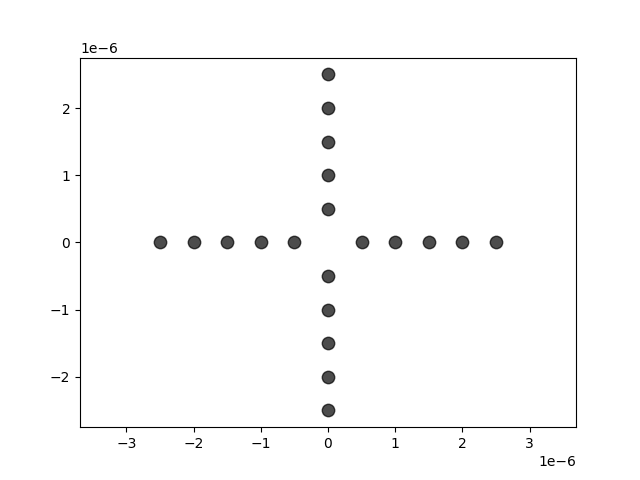

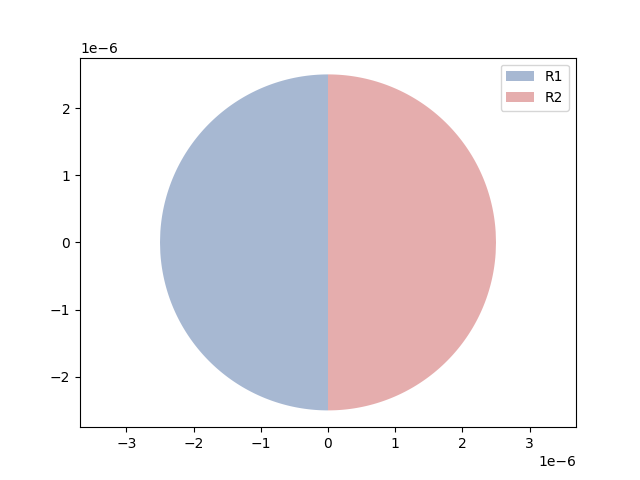

In [7]:
w      = 500 * (10 ** -9)
r1     = 5*w
r2     = -5*w
a      = .1 * w
#points = np.array([[0,0],[a,0],[-a,0],[2*a,0],[3*a,0],[-2*a,0],[-3*a,0],[0,a],[0,2*a],[0,3*a],[0,-a],[0,-2*a],[0,-3*a],[a,a],[a,2*a],[a,3*a],[a,-a],[a,-2*a],[a,-3*a],[-a,a],[-a,2*a],[-a,3*a],[-a,-a],[-a,-2*a],[-a,-3*a],[2*a,a],[2*a,2*a],[2*a,3*a],[2*a,-a],[2*a,-2*a],[2*a,-3*a],[-2*a,a],[-2*a,2*a],[-2*a,3*a],[-2*a,-a],[-2*a,-2*a],[-2*a,-3*a],[3*a,a],[3*a,2*a],[3*a,3*a],[3*a,-a],[3*a,-2*a],[3*a,-3*a],[-3*a,a],[-3*a,2*a],[-3*a,3*a],[-3*a,-a],[-3*a,-2*a],[-3*a,-3*a]])
points = np.array([[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[a,0],[-a,0],[0,a],[0,-a],[4*a,0],[-4*a,0],[0,4*a],[0,-4*a],[5*a,0],[-5*a,0],[0,5*a],[0,-5*a]])
#points = np.array([[3.2*a,0],[-3.2*a,0],[0,3.2*a],[0,-3.2*a],[3.7*a,0],[-3.7*a,0],[0,3.7*a],[0,-3.7*a],[3.5*a,0],[-3.5*a,0],[0,3.5*a],[0,-3.5*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[4*a,0],[-4*a,0],[0,4*a],[0,-4*a]])

paraxial_aprox = (((1/r1) - (1/r2))) ** -1
print('posición aproximada del foco: ', paraxial_aprox, '||| a maximo: ',np.sqrt(25/8))

position_points(points*10)
len_draw(r1,r2,0)

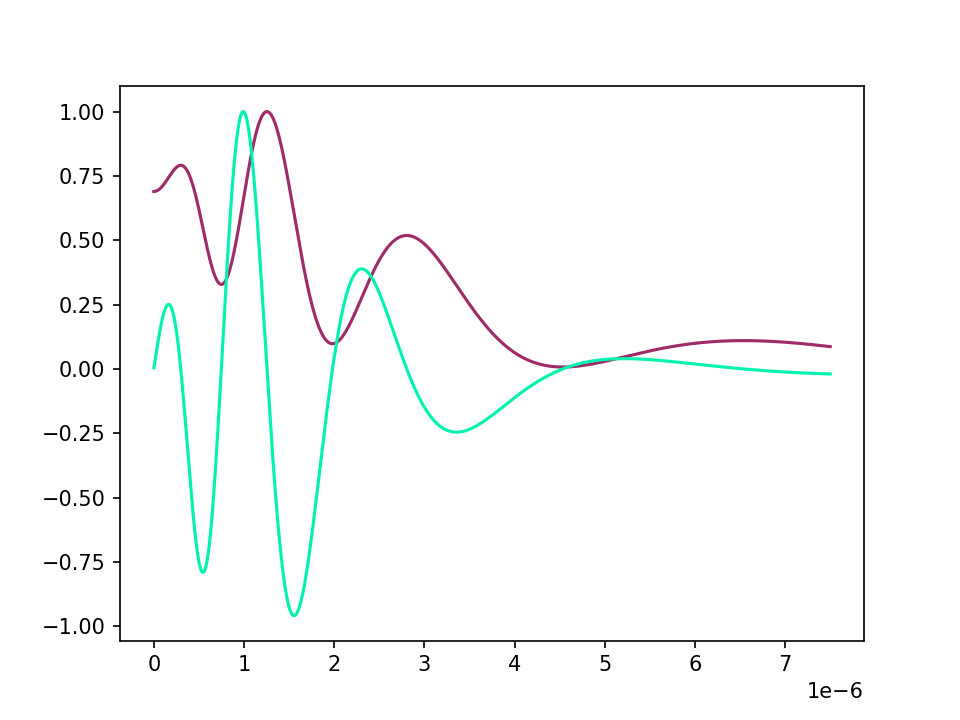

CPU times: user 222 ms, sys: 320 ms, total: 541 ms
Wall time: 192 ms


In [8]:
%%time
zzz = np.linspace(0*w, 15*w, 2000)

z_plot_1 = np.array(list(sum_focus(zzz, points*10, w,r1,r2)), dtype=float)

z_plot_1 = z_plot_1/np.max(z_plot_1)

dz = np.gradient(z_plot_1, zzz)

dz = dz/np.max(dz)

ifft = np.fft.fft(z_plot_1)

fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_1, color="#9F2B68")
# ax.plot(zzz, ifft, color="#9F2B68")
ax.plot(zzz, dz, color="#02F3B0")
# ax.set_xlim([0*w, .5*w])
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

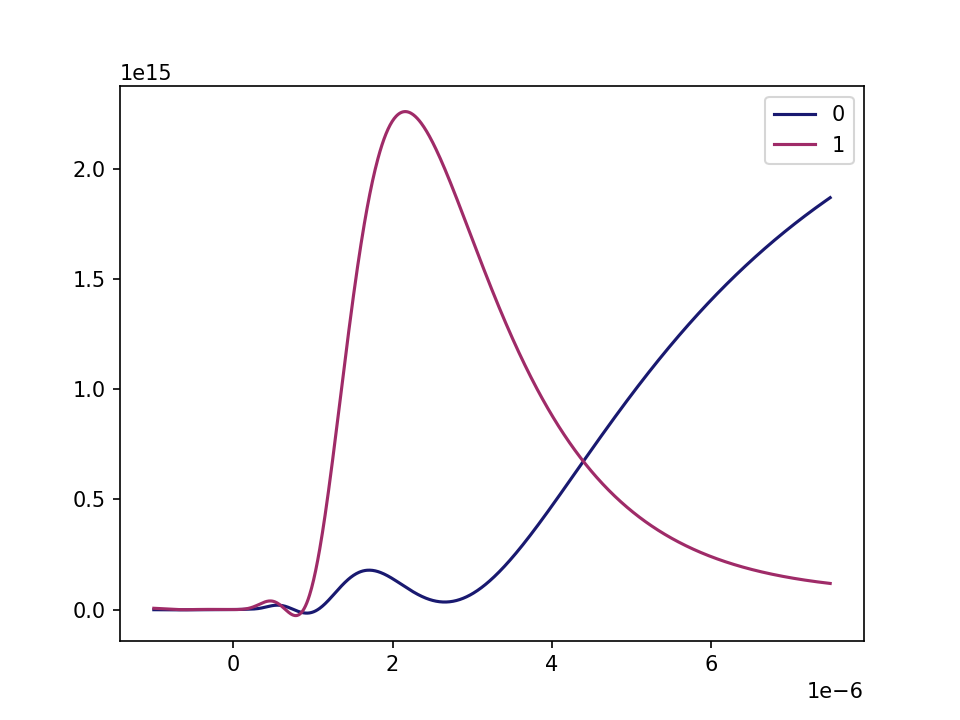

CPU times: user 233 ms, sys: 188 ms, total: 420 ms
Wall time: 210 ms


In [9]:
%%time
zzz = np.linspace(-2*w, 15*w, 1000)
z_plot_0 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*6,w,0,r1,r2)), dtype=float)
z_plot_1 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*6,w,1,r1,r2)), dtype=float)

fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_0, label="0", color="#191970")
ax.plot(zzz, z_plot_1, label="1", color="#9F2B68")
ax.legend()
# ax.set_title("a = 0.2")
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

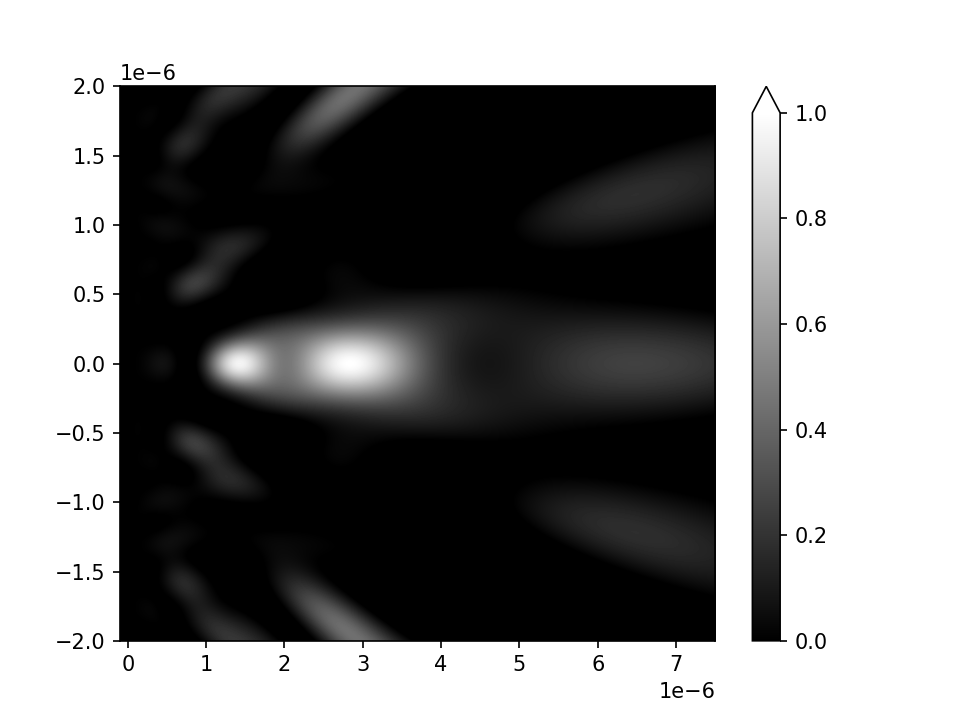

CPU times: user 6.6 s, sys: 2.16 s, total: 8.76 s
Wall time: 8.54 s


(2.5000000000000006e-06, 2.5000000000000006e-06)

In [10]:
%%time
x1, x2 = -4, 4
z1, z2 = -.2, 15
square = np.linspace(x1*w, x2*w, 500)
dz = np.linspace(z1*w, z2*w, 500)

points_new = points*10

z, xx = np.meshgrid(dz, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx, 0, z, points_new, w,1,r1,r2)), dtype=float)

z_mi, z_ma = zz.min(), zz.max()

zz = zz/ z_ma

fig, (ax) = plt.subplots(dpi=150)

c = ax.imshow(zz,vmin=0, vmax=1, cmap = 'gray', extent=[z1*w, z2*w, x1*w,x2*w], 
              aspect='auto', interpolation = 'bicubic')

fig.colorbar(c, ax=ax, extend='max')
#plt.savefig("Geometric Potencial_coherence")
plt.show()
np.max(points_new), r1

# Prueba aberración esferica

In [11]:
p = -1
h = 0.5e-06
n = 1.5
Ls = ((h ** 2) / (8 * (paraxial_aprox ** 3))) * (1 / (n*(n-1))) * ((3*n + 2)*(n-1)*(p**2) + ((n ** 3)/(n-1)))
sh = (Ls + (1/paraxial_aprox)) ** -1
SA = paraxial_aprox-sh
print(sh, paraxial_aprox, SA+paraxial_aprox)

9.868421052631583e-07 1.2500000000000003e-06 1.5131578947368423e-06


# Radio 10 -10

posición aproximada del foco:  2.5000000000000006e-06 ||| a maximo:  1.7677669529663689


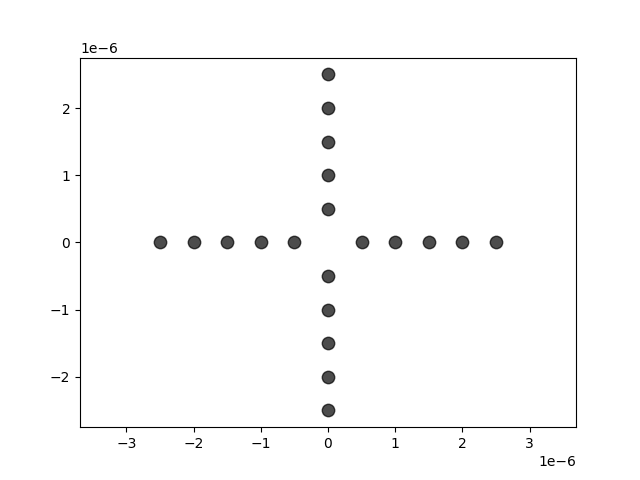

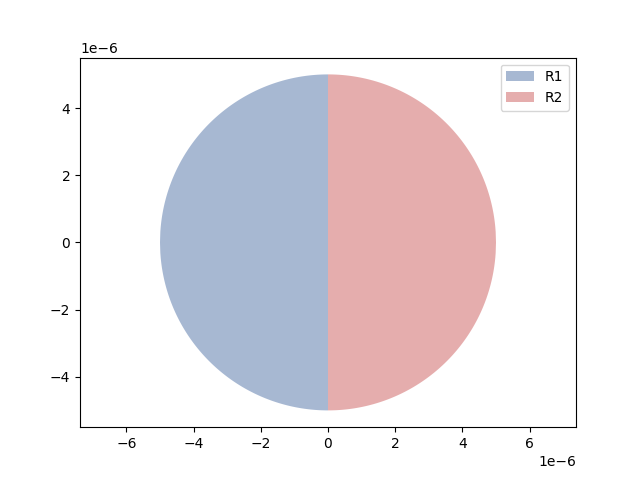

In [12]:
w      = 500 * (10 ** -9)
r1     = 10*w
r2     = -10*w
a      = .1 * w
#points = np.array([[0,0],[a,0],[-a,0],[2*a,0],[3*a,0],[-2*a,0],[-3*a,0],[0,a],[0,2*a],[0,3*a],[0,-a],[0,-2*a],[0,-3*a],[a,a],[a,2*a],[a,3*a],[a,-a],[a,-2*a],[a,-3*a],[-a,a],[-a,2*a],[-a,3*a],[-a,-a],[-a,-2*a],[-a,-3*a],[2*a,a],[2*a,2*a],[2*a,3*a],[2*a,-a],[2*a,-2*a],[2*a,-3*a],[-2*a,a],[-2*a,2*a],[-2*a,3*a],[-2*a,-a],[-2*a,-2*a],[-2*a,-3*a],[3*a,a],[3*a,2*a],[3*a,3*a],[3*a,-a],[3*a,-2*a],[3*a,-3*a],[-3*a,a],[-3*a,2*a],[-3*a,3*a],[-3*a,-a],[-3*a,-2*a],[-3*a,-3*a]])
points = np.array([[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[a,0],[-a,0],[0,a],[0,-a],[4*a,0],[-4*a,0],[0,4*a],[0,-4*a],[5*a,0],[-5*a,0],[0,5*a],[0,-5*a]])
#points = np.array([[3.2*a,0],[-3.2*a,0],[0,3.2*a],[0,-3.2*a],[3.7*a,0],[-3.7*a,0],[0,3.7*a],[0,-3.7*a],[3.5*a,0],[-3.5*a,0],[0,3.5*a],[0,-3.5*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[4*a,0],[-4*a,0],[0,4*a],[0,-4*a]])

paraxial_aprox = (((1/r1) - (1/r2))) ** -1
print('posición aproximada del foco: ', paraxial_aprox, '||| a maximo: ',np.sqrt(25/8))

position_points(points*10)
len_draw(r1,r2,0)

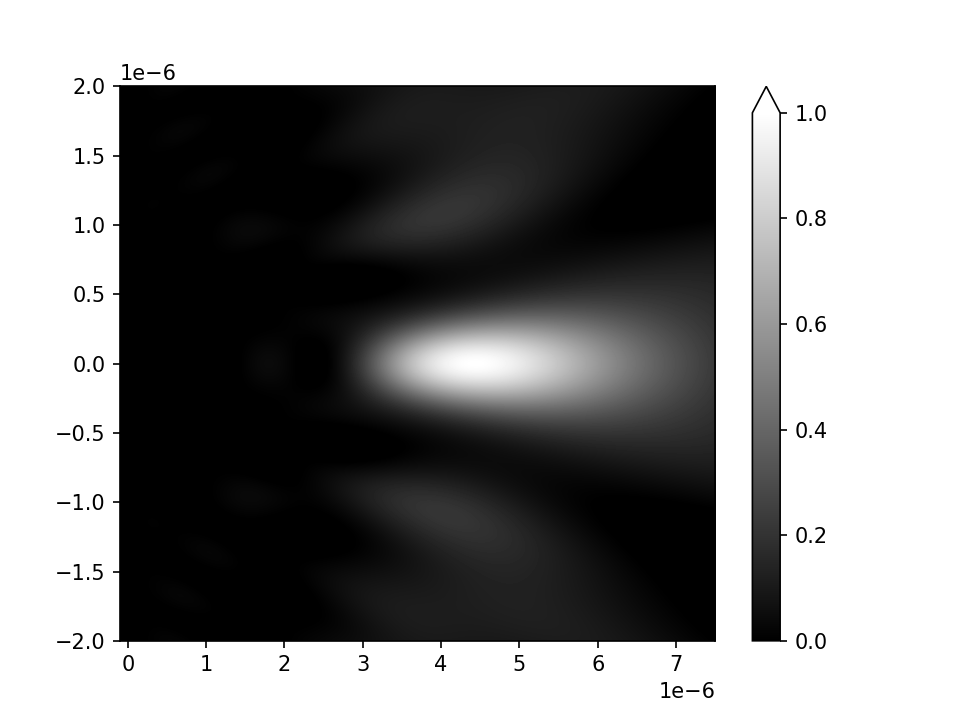

CPU times: user 5.44 s, sys: 1.81 s, total: 7.25 s
Wall time: 6.92 s


In [13]:
%%time
x1, x2 = -4, 4
z1, z2 = -.2, 15
square = np.linspace(x1*w, x2*w, 500)
dz = np.linspace(z1*w, z2*w, 500)

points_new = points*10

z, xx = np.meshgrid(dz, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx, 0, z, points_new, w,1,r1,r2)), dtype=float)

z_mi, z_ma = zz.min(), zz.max()

zz = zz/ z_ma

fig, (ax) = plt.subplots(dpi=150)

c = ax.imshow(zz,vmin=0, vmax=1, cmap = 'gray', extent=[z1*w, z2*w, x1*w,x2*w], 
              aspect='auto', interpolation = 'bicubic')

fig.colorbar(c, ax=ax, extend='max')
#plt.savefig("Geometric Potencial_coherence")
plt.show()

In [14]:
np.max(points_new), 10*w

(2.5000000000000006e-06, 5.000000000000001e-06)

In [15]:
p = -1
h = 3.60e-06
n = 1.5
Ls = ((h ** 2) / (8 * (paraxial_aprox ** 3))) * (1 / (n*(n-1))) * ((3*n + 2)*(n-1) + ((n ** 3)/(n-1)))
sh = paraxial_aprox / (1 + paraxial_aprox*Ls)
print(sh, paraxial_aprox, sh, Ls)

5.610412926391386e-07 2.5000000000000006e-06 5.610412926391386e-07 1382399.9999999988


In [16]:
f = paraxial_aprox
p = 1/f
sigma = (n-1)* ((1/r1) + (1/r2))
k = -(p/2)
beta = (n-1) * ((1/(r1**3)) - (1/(r2**3)))*0.714
U = (p ** 3)*((n**2)/(8*((n-1)**2)))  -  (k**2)*p*(n/(2*(n+2)))  +  (p/(2*n*(n+2))) * ((2*(n+1)*k) ** 2) + (beta/2)
U*(h**4)

1.839560232959998e-05

In [17]:
r1r2 = -0.167
r2_ws = (r1*2)*r1r2
r2_ws, r2, r1

(-1.6700000000000005e-06, -5.000000000000001e-06, 5.000000000000001e-06)